In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from mpl_toolkits.mplot3d import Axes3D

dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

# df.corr().abs().nlargest(3, 'MEDV')

x = df[['LSTAT', 'RM']]
y = df['MEDV']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

x_train_poly = PolynomialFeatures(degree=2).fit_transform(x_train)
x_test_poly = PolynomialFeatures(degree=2).fit_transform(x_test)

model = LinearRegression()
model.fit(x_train, y_train)
print('R-Squared: %.4f' % model.score(x_test, y_test))

# degree 2 polynomial
model2 = LinearRegression()
model2.fit(x_train_poly, y_train)

print('R-Squared: %.4f' % model2.score(x_test_poly, y_test))

# degree 3 polynomial
x_train_poly3 = PolynomialFeatures(degree=3).fit_transform(x_train)
x_test_poly3 = PolynomialFeatures(degree=3).fit_transform(x_test)

model3 = LinearRegression()
model3.fit(x_train_poly3, y_train)
print('R-Squared: %.4f' % model3.score(x_test_poly3, y_test))


R-Squared: 0.6162
R-Squared: 0.7340
R-Squared: 0.7049


<h3>Plot Hyperplane</h3>

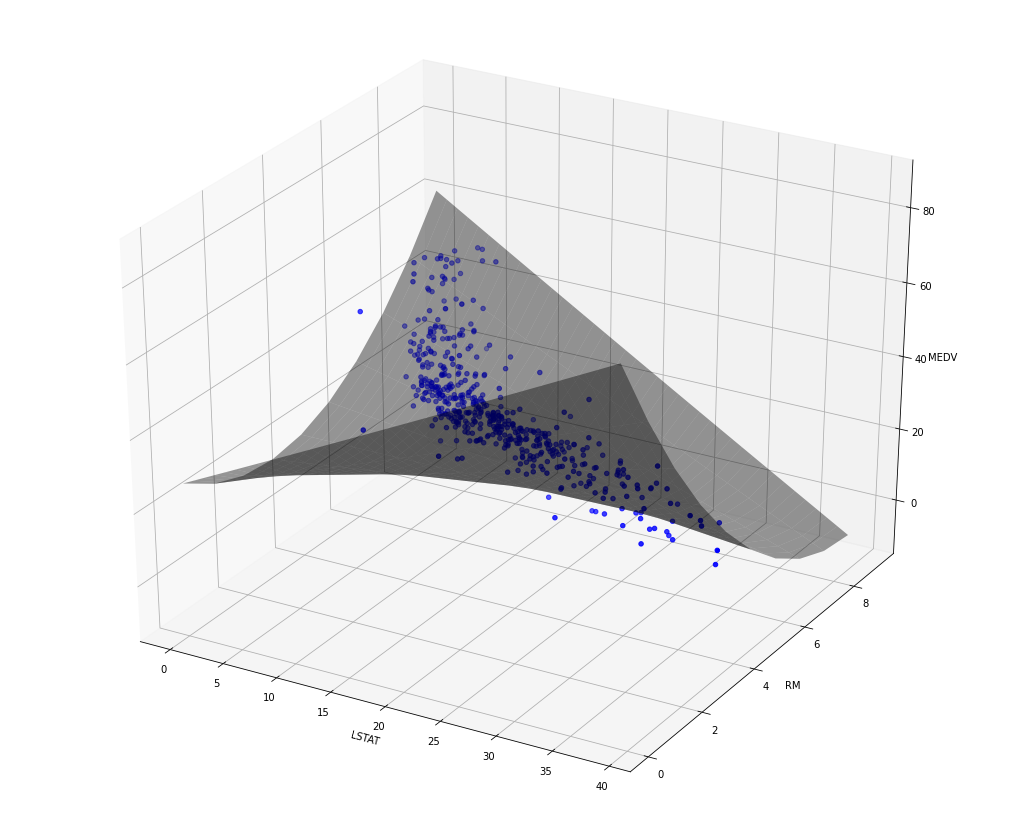

In [37]:
fig = plt.figure(figsize=(18, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x['LSTAT'], x['RM'], y, c='b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("MEDV")

x_surf = np.arange(0, 40, 1)
y_surf = np.arange(0, 10, 1)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

z = lambda x, y : (model2.intercept_ + (model2.coef_[1] * x) + (model2.coef_[2] * y) + (model2.coef_[3] * x**2) + (model2.coef_[4] * x*y) + (model2.coef_[5] * y**2))

ax.plot_surface(x_surf, y_surf, z(x_surf, y_surf), rstride=1, cstride=1, color='None', alpha=0.4)
plt.show()